# Degree distribution


The degree distribution is crucial to understand the friendship paradox.
We will first introduce a formal definition of the degree distribution. Then, we will learn how to plot the degree distribution of a network.

![](https://barabasi.com/img/6/159.png)


## Definition

The degree of a node $i$, denoted by $d_i$, is the number of edges connected to it. With the adjacency matrix $A$, the degree of node $i$ is given by:

$$
d_i = \sum_{j=1}^N A_{ij}.
$$

The degree distribution $p(d)$ is the probability that a node has $d$ edges.

Let us compute the degree distribution of a network. We will create a Barabási-Albert network with $N=10,000$ nodes and $m=1$ edge per node.

In [1]:
import igraph
g = igraph.Graph.Barabasi(n = 10000, m = 1) # Create a Barabási-Albert network

Compute the degree of each node by summing the elements of the adjacency matrix along the rows.

In [2]:
import numpy as np
deg = np.array(g.degree())

# or using the adjacency matrix
# deg = np.sum(A, axis=1)
# deg = deg.flatten()

The degree distribution $p(d)$ can be computed by counting the number of nodes with each degree and dividing by the total number of nodes.

In [3]:
p_deg = np.bincount(deg) / len(deg)

`np.bincount` returns the number of nodes with each degree. For example, `np.bincount([1, 2, 2, 3, 3, 3])` returns `[0, 1, 2, 3]`, which means there is 1 node with degree 1, 2 nodes with degree 2, and 3 nodes with degree 3.

Let us plot the degree distribution. This is not as trivial as you might think... 🤔

Text(0, 0.5, 'Probability')

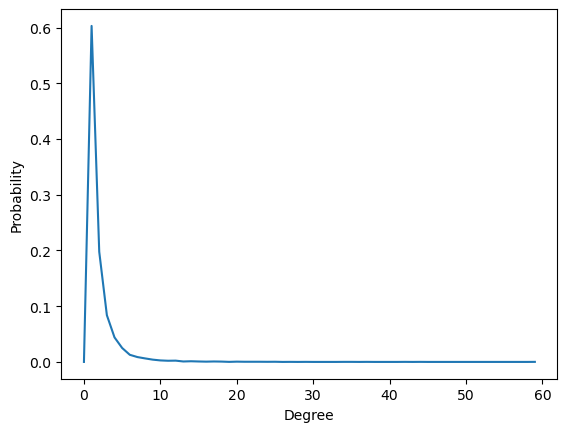

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

While it clearly shows that most nodes have small degree, it does not show the tail of the distribution clearly, and often it is this tail that is of great interest (e.g., hub nodes). To show the tail of the distribution more clearly, we can use a log-log plot.

Text(0, 0.5, 'Probability')

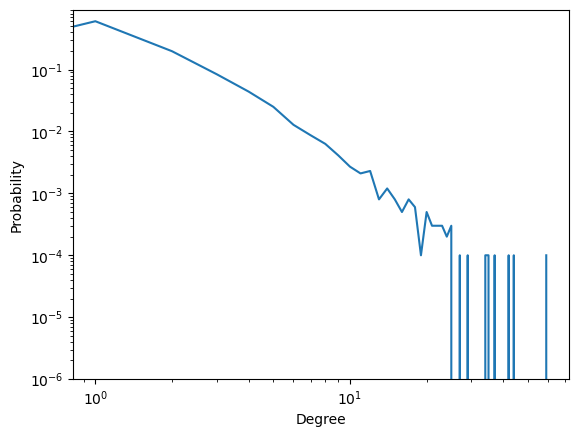

In [5]:
ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(np.min(p_deg[p_deg>0])*0.01, None)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

We see fluctuations for large degree nodes because of the small number of nodes with large degree.
One can use "binning" to smooth the plot. Binning involves grouping the data into bins and calculating the fraction of data within each bin. However, selecting an appropriate bin size can be challenging, and even with a well-chosen bin size, some information may be lost.

A more convenient way is to use cumulative distribution function (CDF) and its complement, the complementary cumulative distribution function (CCDF).
The CDF at degree $d$ is the probability that a randomly chosen node has degree $d'$ less than or equal to $d$ ($d' \leq d$).

$$
\text{CDF}(d) = P(d' \leq d) = \sum_{d'=0}^d p(d')
$$

The CCDF at degree $d$ is the probability that a randomly chosen node has degree $d'$ greater than $d$ ($d' > d$).

$$
\text{CCDF}(d) = P(d' > d) = \sum_{d'=d+1}^\infty p(d')
$$

The benefits of using CDF and CCDF are:
- CDF is a monotonically increasing function of $d$, and CCDF is a monotonically decreasing function of $d$.
- CDF and CCDF can be plotted as a smooth curve on a log-log scale without binning.

### Exercise 01: Compute the CDF and CCDF 🏋️‍♀️

1. Plot the CDF and CCDF of the degree distribution using histogram or lineplot. Do not use `sns.ecdfplot` or similar APIs that directly compute the CDF or CCDF from the data. You are the one who computes the CDF and CCDF from the degree distribution.
2. Provide your estimate of the slope of the CCDF in the log-log plot. (What does the slope tell us about the degree distribution? Check out the lecture note for more details.)

**CDF**

**CCDF**

# Degree distribution of a friend

We will now consider the degree distribution of a friend of a node.

There are two ways to sample a friend of a node.
1. Sample a node uniformly at random and then sample a friend of the node.
2. Sample a *friendship* (i.e., edge) uniformly at random and then sample an end node of the edge.

Let us focus on the second case and leave the first case for interested students as an exercise.
In the second case, we sample an edge from the network.
This sampling is biased towards nodes with many edges, i.e., a person with $d$ edges is $d$ times more likely to be sampled than someone with 1 edge.
Thus, the degree distribution $p'(d)$ of a friend is given by

$$
p' (d) = C \cdot d \cdot p(d)
$$

The additional term $d$ reflects the fact that a person with $d$ friends is $d$ times more likely to be sampled than someone with 1 friend.
Term $C$ is the normalization constant that ensures the sum of probabilities $p'(d)$ over all $d$ is 1, which can be easily computed as follows:

$$
C = \frac{1}{\sum_{d} d \cdot p(d)} = \frac{1}{\langle d \rangle}
$$

where $\langle d \rangle$ is the average degree of the network. Substituting $C$ into $p'(d)$, we get:

$$
p' (d) = \frac{d}{\langle d \rangle} p(d)
$$

This is the degree distribution of a friend, and it is easy to verify that $p'(d) > p(d)$ for $k \geq \langle d \rangle$, i.e., a friend has a higher chance of having a higher degree than a node. In other words, the friendship paradox 😉.


## Exercise 02: Compare the degree distribution of a node and its friend 🏋️‍♀️

Let us compare the degree distribution of a node and its friend. It consists of the following steps
-  Get the edges in the network, from which we sample a friend.
-  Get the degree of each friend.
- Compute the degree distribution of friends.

1. Compute the average degree of nodes and friends.
2. Plot the CCDF and CDF of the degree distribution of nodes and friends in the same plot.
3. Compare the slope of the CCDF of a node and its friend.

**Tips:**
You can get the edges in the network from the adjacency matrix by using `sparse.find`.

In [6]:
A = g.get_adjacency() # Get the adjacency matrix
from scipy import sparse
src, trg, weight = sparse.find(A)

- `sparse.find(A)` returns the source node, target node, and edge weight of the edge.
- `src` is the source node of the edge
- `trg` is the target node of the edge
- `weight` is the edge weight.

```{footbibliography}
```